In [1]:
from retina_function import *

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


2021-08-19 17:30:11.653563: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
from tensorflow.keras import models
"""
This function creates new directory and stores the new image in the created folder.   
@param: image represents the image path.
@param: directory_name represents the directory_name.   
"""

def create_save_img_archlight_clean(image, directory_name):       
       """
       destroy and create new directory.
       check if the directory exists, if it exists ignore and write images to the directory.
       modified from: https://www.geeksforgeeks.org/delete-a-directory-or-file-using-python/
       """
       try:
              if not os.path.exists(directory_name):
                  os.makedirs(directory_name)
              else:
                     for files in glob(directory_name+"/*"):
                            os.remove(files)
                             
              for image_path in image:
                     img = cv.imread(image_path, cv.IMREAD_COLOR)
                     imag = img.copy()
                    
                     resized_img = resize_rgb(imag)
                     resized_img[np.all(resized_img >= (220, 220, 220), axis=-1)] = (160,77,66)


                     # resize the image to width 224 and height 224.
                     os.chdir(directory_name)
                     cv.imwrite(os.path.basename(image_path), cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))
                  
       except OSError as error:
              print("Directory '% s' can not be removed" % directory_name)
            
def create_save_img_archlight(image, directory_name):       
       """
       destroy and create new directory.
       check if the directory exists, if it exists ignore and write images to the directory.
       modified from: https://www.geeksforgeeks.org/delete-a-directory-or-file-using-python/
       """
       try:
              if not os.path.exists(directory_name):
                  os.makedirs(directory_name)
              else:
                     for files in glob(directory_name+"/*"):
                            os.remove(files)
                             
              for image_path in image:
                     img = cv.imread(image_path, cv.IMREAD_COLOR)
                     imag = img.copy()
                    
                     resized_img = resize_rgb(imag)

                     # resize the image to width 224 and height 224.
                     os.chdir(directory_name)
                     cv.imwrite(os.path.basename(image_path), cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))
                  
       except OSError as error:
              print("Directory '% s' can not be removed" % directory_name)


def get_optic_disc_mask(image_y):
       global first, first_
       image = image_y.copy()
       dark_black1 = np.array([0,0,130])
       dark_black2 = np.array([100,100,255])
       
       mask= cv.inRange(image, dark_black1, dark_black2)

       medianFiltered = cv.medianBlur(mask,3)
       cnts, hierarchy = cv.findContours(medianFiltered, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
       
       for i in cnts:
              first = cv.drawContours(mask, [i], 0, (255), -10)
       kernel = np.ones((3,3), np.uint8)
       first = cv.dilate(first, kernel, iterations=1)
        
       mask_2 = cv.inRange(first, 230, 255)
       cntsx, hierarchyx = cv.findContours(mask_2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
       for i in cntsx:
              first_ = cv.drawContours(mask_2, [i], 0, (255), -10)
              
       return first_

def get_optic_cup_mask(image_y):
       global first, first_
       image = image_y.copy()
       dark_black1 = np.array([0,130,0])
       dark_black2 = np.array([100,255,100])
       
       mask= cv.inRange(image, dark_black1, dark_black2)

       medianFiltered = cv.medianBlur(mask,3)
       cnts, hierarchy = cv.findContours(medianFiltered, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
       
       for i in cnts:
              first = cv.drawContours(mask, [i], 0, (255), -10)
       kernel = np.ones((3,3), np.uint8)
       first = cv.dilate(first, kernel, iterations=1)
        
       mask_2 = cv.inRange(first, 230, 255)
       cntsx, hierarchyx = cv.findContours(mask_2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
       for i in cntsx:
              first_ = cv.drawContours(mask_2, [i], 0, (255), -10)
              
       return first_


def remove_gray_edges(image):
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    gray[gray != 240] = 1
    gray[gray == 240] = 0
    contours,hierarchy = cv.findContours(gray,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv.boundingRect(cnt)
    new_image = image[y:y+h,x:x+w]
    
    return cv.cvtColor(new_image, cv.COLOR_BGR2RGB)

    
def create_save_optic_cup(image, directory_name):       
       """
       destroy and create new directory.
       check if the directory exists, if it exists ignore and write images to the directory.
       modified from: https://www.geeksforgeeks.org/delete-a-directory-or-file-using-python/
       """
       try:
              if not os.path.exists(directory_name):
                  os.makedirs(directory_name)
              else:
                     for files in glob(directory_name+"/*"):
                            os.remove(files)
                             
              for image_path in image:
                     img = cv.imread(image_path)
                     # resize the image to width 224 and height 224.
                     new_img = remove_gray_edges(img)
                     new_img = cv.resize(new_img, (400,400))
                     optic_cup = get_optic_cup_mask(new_img)
       
                     os.chdir(directory_name)
                     cv.imwrite(os.path.basename(image_path), optic_cup)
                  
       except OSError as error:
              print("Directory '% s' can not be removed" % directory_name)

def create_save_optic_disc(image, directory_name):       
       """
       destroy and create new directory.
       check if the directory exists, if it exists ignore and write images to the directory.
       modified from: https://www.geeksforgeeks.org/delete-a-directory-or-file-using-python/
       """
       try:
              if not os.path.exists(directory_name):
                  os.makedirs(directory_name)
              else:
                     for files in glob(directory_name+"/*"):
                            os.remove(files)
                             
              for image_path in image:
                     img = cv.imread(image_path)
                     # resize the image to width 224 and height 224.
                     new_img = remove_gray_edges(img)
                     new_img = cv.resize(new_img, (400,400))
                     optic_disc = get_optic_disc_mask(new_img)
                     os.chdir(directory_name)
                     cv.imwrite(os.path.basename(image_path), optic_disc)
                  
       except OSError as error:
              print("Directory '% s' can not be removed" % directory_name)

    

### extracting the images and annotation from the archlight folders.

In [3]:
folder_path = os.getcwd()
documents_direc = folder_path
# getting the path of the retina images and ground truth
retina_images = natsorted(glob(os.path.join(documents_direc,"data","original","*.png")))
retina_masks = natsorted(glob(os.path.join(documents_direc,"data","Carly2nd","*.png")))

print ("Total retina_images: {}, and total ground truth images: {}".
       format(len(retina_images),len(retina_masks)))

# split the retina_images into train and test images
train_ret, test_ret, train_mask, test_mask = train_test_split(
       retina_images, retina_masks, test_size=0.05, random_state=123)
# further split the train_retina images and train_mask into validation data.
# Thus we have both train, validation and test data, making our solution robust.

train_ret_, validation_ret, train_mask_, validation_mask = train_test_split(
       train_ret, train_mask, test_size=0.4, random_state=123)

# create a new folder to hold the train, test and validation retina_images. pre-processed data.
retina_train_folder = os.path.join(documents_direc,"data","archlight","train/retina")
retina_valid_folder = os.path.join(documents_direc,"data","archlight","valid/retina")
retina_test_folder = os.path.join(documents_direc,"data","archlight","test/retina")

### without preprocessing
### The images contained artefacts, we need to preprocess
retina_train_folder_ = os.path.join(documents_direc,"data","archlight","train_/retina")
retina_valid_folder_ = os.path.join(documents_direc,"data","archlight","valid_/retina")
retina_test_folder_ = os.path.join(documents_direc,"data","archlight","test_/retina")


# create a new folder to hold the optic disc of the train, test and validation retina images
############################################################################################
mask_train_folder_disc = os.path.join(documents_direc,"data","archlight","mask_train/disc/retina")
mask_valid_folder_disc = os.path.join(documents_direc,"data","archlight","mask_valid/disc/retina")
mask_test_folder_disc = os.path.join(documents_direc,"data","archlight","mask_test/disc/retina")

# create a new folder to hold the optic cup of the train, test and validation retina images
############################################################################################
mask_train_folder_cup = os.path.join(documents_direc,"data","archlight","mask_train/cup/retina")
mask_valid_folder_cup = os.path.join(documents_direc,"data","archlight","mask_valid/cup/retina")
mask_test_folder_cup = os.path.join(documents_direc,"data","archlight","mask_test/cup/retina")

# call the function to create the folder for the pre-processed image.
create_save_img_archlight_clean(train_ret_, retina_train_folder) # train images and folder.
create_save_img_archlight_clean(validation_ret, retina_valid_folder) # validation images and folder.
create_save_img_archlight_clean(test_ret, retina_test_folder) # test images and folder.

# call the function to create the folder.
create_save_img_archlight(train_ret_, retina_train_folder_) # train images and folder.
create_save_img_archlight(validation_ret, retina_valid_folder_) # validation images and folder.
create_save_img_archlight(test_ret, retina_test_folder_) # test images and folder.

# call the function to create mask for optic disc
###########################################################################
create_save_optic_disc(train_mask_, mask_train_folder_disc) # train mask and folder.
create_save_optic_disc(validation_mask, mask_valid_folder_disc) # validation mask and folder.
create_save_optic_disc(test_mask, mask_test_folder_disc) # test mask and folder.

# call the function to create mask for optic disc
###########################################################################
create_save_optic_cup(train_mask_, mask_train_folder_cup) # train mask and folder.
create_save_optic_cup(validation_mask, mask_valid_folder_cup) # validation mask and folder.
create_save_optic_cup(test_mask, mask_test_folder_cup) # test mask and folder.

### artefacts covered.
train_preprocessed = natsorted(glob(os.path.join(retina_train_folder,"*.png")))
valid_preprocessed = natsorted(glob(os.path.join(retina_valid_folder,"*.png")))
test_preprocessed = natsorted(glob(os.path.join(retina_test_folder,"*.png")))

train = natsorted(glob(os.path.join(retina_train_folder_,"*.png")))
valid = natsorted(glob(os.path.join(retina_valid_folder_,"*.png")))
test = natsorted(glob(os.path.join(retina_test_folder_,"*.png")))

train_mask_cup = natsorted(glob(os.path.join(mask_train_folder_cup,"*.png")))
train_mask_disc = natsorted(glob(os.path.join(mask_train_folder_disc,"*.png")))

valid_mask_cup = natsorted(glob(os.path.join(mask_valid_folder_cup,"*.png")))
valid_mask_disc = natsorted(glob(os.path.join(mask_valid_folder_disc,"*.png")))

test_mask_cup = natsorted(glob(os.path.join(mask_test_folder_cup,"*.png")))
test_mask_disc = natsorted(glob(os.path.join(mask_test_folder_disc,"*.png")))

Total retina_images: 41, and total ground truth images: 41


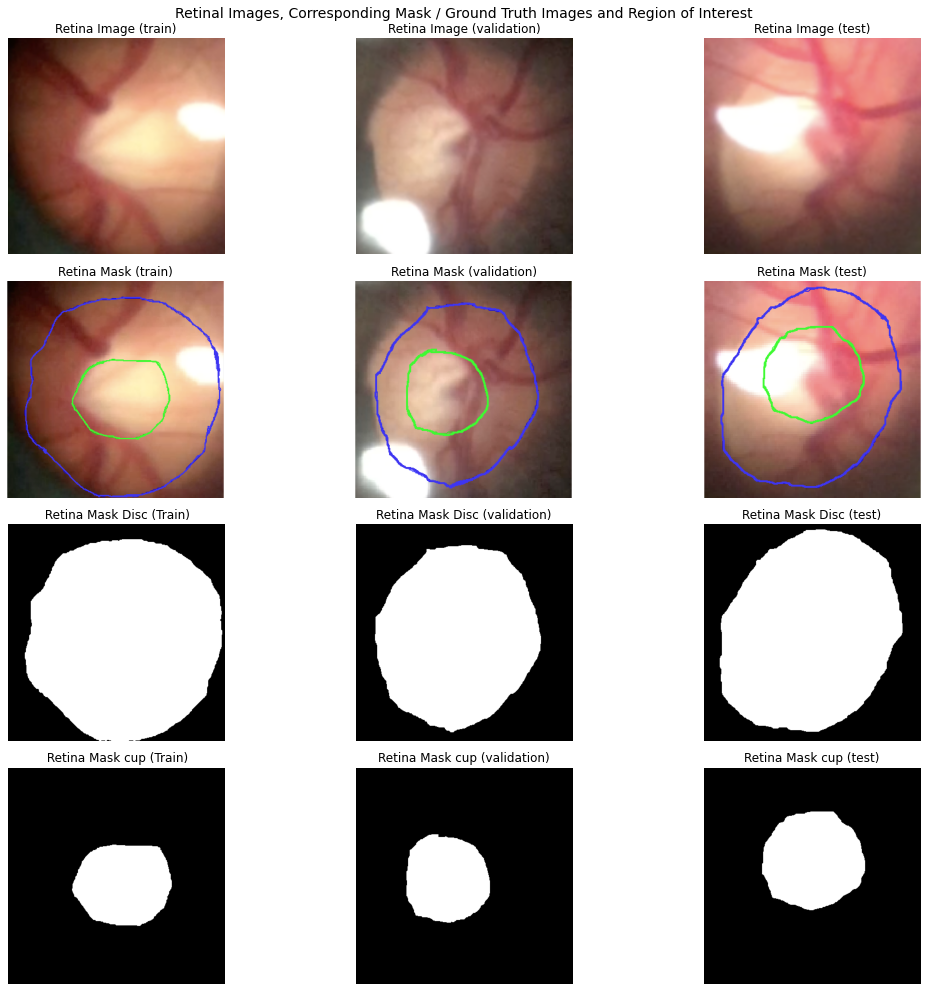

In [4]:
train_mask_ = natsorted(train_mask_)
validation_mask = natsorted(validation_mask)
test_mask = natsorted(test_mask)

train_im = cv.imread(train_mask_[1])
valid_im = cv.imread(validation_mask[1])
test_im = cv.imread(test_mask[1])

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(16,14))
show_image(ax[0,0],train[1],"Retina Image (train)")
show_image(ax[0,1],valid[1],"Retina Image (validation)")
show_image(ax[0,2],test[1],"Retina Image (test)")

show_image_roi(ax[1,0],remove_gray_edges(train_im),"Retina Mask (train)")
show_image_roi(ax[1,1],remove_gray_edges(valid_im),"Retina Mask (validation)")
show_image_roi(ax[1,2],remove_gray_edges(test_im),"Retina Mask (test)")

show_image(ax[2,0],train_mask_disc[1]," Retina Mask Disc (Train)")
show_image(ax[2,1],valid_mask_disc[1],"Retina Mask Disc (validation)")
show_image(ax[2,2],test_mask_disc[1],"Retina Mask Disc (test)")

show_image(ax[3,0],train_mask_cup[1]," Retina Mask cup (Train)")
show_image(ax[3,1],valid_mask_cup[1],"Retina Mask cup (validation)")
show_image(ax[3,2],test_mask_cup[1],"Retina Mask cup (test)")

plt.suptitle("Retinal Images, Corresponding Mask / Ground Truth Images and Region of Interest", fontsize="14")
plt.tight_layout()
plt.show()

In [5]:
# data preprocessing- normalizing the data for both train and validation set
# modified from: https://stackoverflow.com/questions/58050113/imagedatagenerator-for-semantic-segmentation

seed = 123 # to transform image and corresponding mask with same augmentation parameter.
IMG_SIZE = (400,400)
batch_size = 6
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    height_shift_range=0.5,
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    height_shift_range=0.5,
)


train_image_generator = train_datagen.flow_from_directory(
    os.path.join(documents_direc,"data","archlight","train_"), 
    target_size=IMG_SIZE,batch_size= batch_size, class_mode=None,
    seed=seed, shuffle=False, subset="training", color_mode="rgb"
)

train_mask_generator_disc = train_datagen.flow_from_directory(
    os.path.join(documents_direc,"data","archlight","mask_train","disc")
    , target_size=IMG_SIZE,batch_size= batch_size, class_mode=None,
    seed=seed, shuffle=False, color_mode="grayscale"
)

train_mask_generator_cup = train_datagen.flow_from_directory(
    os.path.join(documents_direc,"data","archlight","mask_train","cup")
    , target_size=IMG_SIZE,batch_size= batch_size, class_mode=None,
    seed=seed, shuffle=False, color_mode="grayscale"
)

val_image_generator = train_datagen.flow_from_directory(
    os.path.join(documents_direc,"data","archlight","valid_"), 
    target_size=IMG_SIZE,batch_size= batch_size, class_mode=None,
    seed=seed, shuffle=False, color_mode="rgb"
)

val_mask_generator_disc = train_datagen.flow_from_directory(
        os.path.join(documents_direc,"data","archlight","mask_valid","disc"), 
    target_size=IMG_SIZE,batch_size= batch_size, class_mode=None,
    seed=seed, shuffle=False, color_mode="grayscale"
)

val_mask_generator_cup = train_datagen.flow_from_directory(
        os.path.join(documents_direc,"data","archlight","mask_valid","cup"), 
    target_size=IMG_SIZE,batch_size= batch_size, class_mode=None,
    seed=seed, shuffle=False, color_mode="grayscale"
)

# zip both train and validation validators into a single file.
train_generator_disc = zip(train_image_generator, train_mask_generator_disc)
val_generator_disc = zip(val_image_generator, val_mask_generator_disc)
train_generator_cup = zip(train_image_generator, train_mask_generator_cup)
val_generator_cup = zip(val_image_generator, val_mask_generator_cup)

Found 22 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
Found 16 images belonging to 1 classes.
Found 16 images belonging to 1 classes.
Found 16 images belonging to 1 classes.


### Transfer Learning phase

In [6]:
disc_model_weight = os.path.join(documents_direc,"data","MESSIDOR","files","retina_model_disc.h5")
cup_model_weight = os.path.join(documents_direc,"data","MESSIDOR","files","retina_model_cup.h5")

archlight_disc_model = models.load_model(disc_model_weight, custom_objects={'focal_tversky_loss': focal_tversky_loss, 'dice_coef':dice_coef, 'iou':iou})
archlight_disc_model.summary()

2021-08-19 17:30:15.877701: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-19 17:30:15.901535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1034] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 17:30:15.902099: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7085GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2021-08-19 17:30:15.902119: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-19 17:30:15.905801: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-19 17:30:15.905855: I tensorflow/stream_execut

Model: "ret_u-net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 400, 400, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 400, 400, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 400, 400, 32) 0           batch_normalization[0][0]        
__________________________________________________________________________________________

In [7]:
#archlight_cup_model = models.load_model(cup_model_weight, custom_objects={'dice_loss': dice_loss, 'dice_coef':dice_coef, 'iou':iou})
# archlight_cup_model.summary()

In [8]:
for layers in archlight_disc_model.layers[:-1]:
    layers.trainable = False
input_shape = (400,400,3)
inputs = Input(input_shape, name="input_layer_2")
# archlight_disc_model.summary()


In [9]:
log_file = os.path.join(documents_direc,"data","archlight","files")
create_directory(log_file)

# set the model hyperparamteres
BATCH = 6
learning_rate = 1e-5
num_epochs = 100
model_path_disc = log_file+"/archlight_model_disc.h5"
csv_path_disc = log_file+"/data_disc.csv"

model_path_cup = log_file+"/archlight_model_cup.h5"
csv_path_cup = log_file+"/data_cup.csv"

train_steps = (len(train_ret_)//BATCH)
validation_steps = (len(validation_ret)//BATCH)

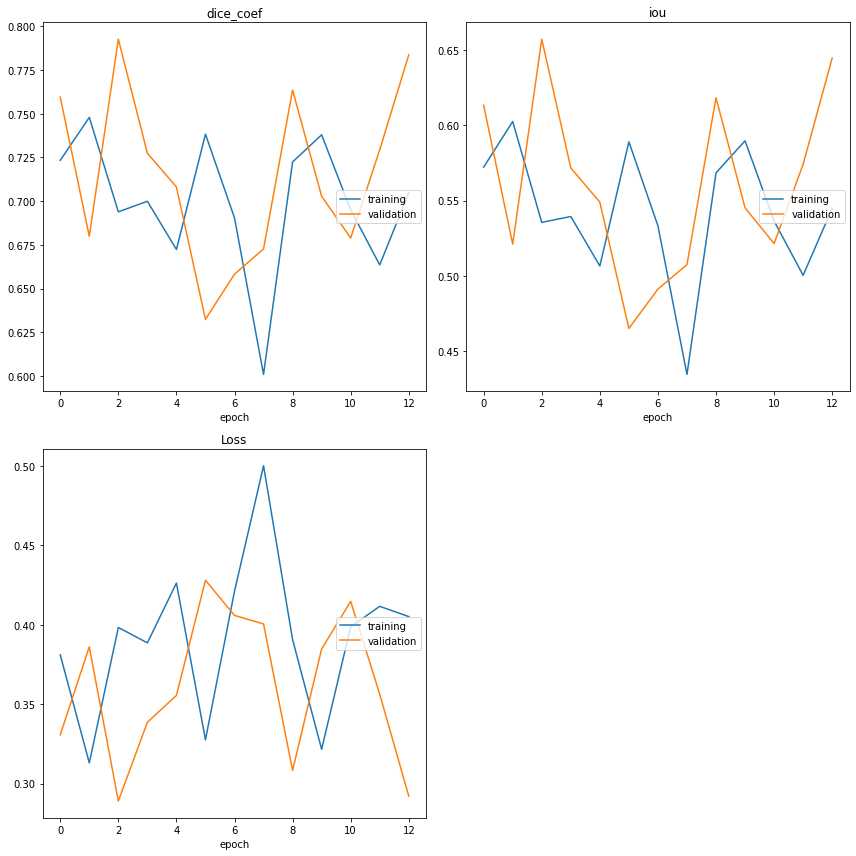

dice_coef
	training         	 (min:    0.601, max:    0.748, cur:    0.705)
	validation       	 (min:    0.632, max:    0.793, cur:    0.784)
iou
	training         	 (min:    0.435, max:    0.602, cur:    0.545)
	validation       	 (min:    0.465, max:    0.657, cur:    0.645)
Loss
	training         	 (min:    0.313, max:    0.500, cur:    0.405)
	validation       	 (min:    0.289, max:    0.428, cur:    0.292)


In [10]:
metrics = [dice_coef, iou]

archlight_disc_model.compile(
    loss=[focal_tversky_loss], optimizer=Adam(learning_rate), metrics=metrics
)

callbacks = [
    ModelCheckpoint(model_path_disc, verbose=1, save_best_only=True),
    CSVLogger(csv_path_disc),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    PlotLossesKeras()
]

history = archlight_disc_model.fit(
        train_generator_disc,
        epochs=num_epochs,
        validation_data=val_generator_disc,
        steps_per_epoch=train_steps,
        validation_steps=validation_steps,
        callbacks=callbacks
    )

In [11]:
from skimage.segmentation import clear_border, mark_boundaries
    
def show_image_pred(axis, image, title):
       axis.imshow(image, cmap='gray')
       axis.axis('off')
       axis.set_title(title)
        
        
def pred_and_save(image_, image_mask):
    scores = []
    images = []
    dict_score = {}
    for a in range(len(image_)):
        image = cv.imread(image_[a])
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        img = cv.resize(image, (400,400))
        img_yuv = cv.cvtColor(img, cv.COLOR_RGB2YUV)
        clahe = cv.createCLAHE(clipLimit=1, tileGridSize=(2,2))
        img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
        img = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
        img_1 = cv.bilateralFilter(img, 9, 75, 75)
        img = img_1.copy()

        
        x = img/255.0
        x = x.astype(np.float32)
        x = np.expand_dims(x, axis=0)
        
        y_pred = archlight_disc_model.predict(x)[0]
        y_pred = np.where(y_pred > 0.5, 1.0, 0.0)

        y_pred_ = y_pred.copy()
        y_pred = np.squeeze(y_pred, axis=-1)
        y_pred = cv.resize(y_pred, (400,400))
        kernel = np.ones((15,15), np.uint8)
        y_pred = cv.morphologyEx(y_pred, cv.MORPH_OPEN, kernel)
        y_pred = get_largest_contour(y_pred)
        y_pred = color_mask(y_pred)
        y_pred = y_pred.astype(np.float32)
        y_pred = y_pred / 255.0
        
        y_true = cv.imread(image_mask[a])
        y_true = cv.cvtColor(y_true,cv.COLOR_BGR2GRAY)
        y_true = y_true.astype(np.float32)
        y_true = y_true/255.
        score = dice_coef(y_true, y_pred.astype(np.float32), smooth=1)
        scores.append(float(score))
        images.append(y_pred)
        dict_score[a] = float(score)
    return np.mean(scores) * 100, dict_score, images, scores

# creating directory for optic disc messidor prediction
train_score, dict_list_train, images_train, scores_train = pred_and_save(train, train_mask_disc)
valid_score, dict_list_valid, images_valid, scores_valid = pred_and_save(valid, valid_mask_disc)
test_score, dict_list_test, images_test, scores_test = pred_and_save(test, test_mask_disc)

#
dict_list_train= sorted(dict_list_train, reverse=True)[:4]
scores_train = sorted(scores_train, reverse=True)[:4]

dict_list_valid= sorted(dict_list_valid, reverse=True)[:4]
scores_valid = sorted(scores_valid, reverse=True)[:4]

dict_list_test= sorted(dict_list_test, reverse=True)[:4]
scores_test = sorted(scores_test, reverse=True)[:4]

In [12]:
print("Train Dice coeficient Score is: {:.2f}".format(train_score))
print("Valid Dice coeficient Score is: {:.2f}".format(valid_score))
print("Test Dice coeficient Score is: {:.2f}".format(test_score))

Train Dice coeficient Score is: 79.87
Valid Dice coeficient Score is: 81.00
Test Dice coeficient Score is: 84.76


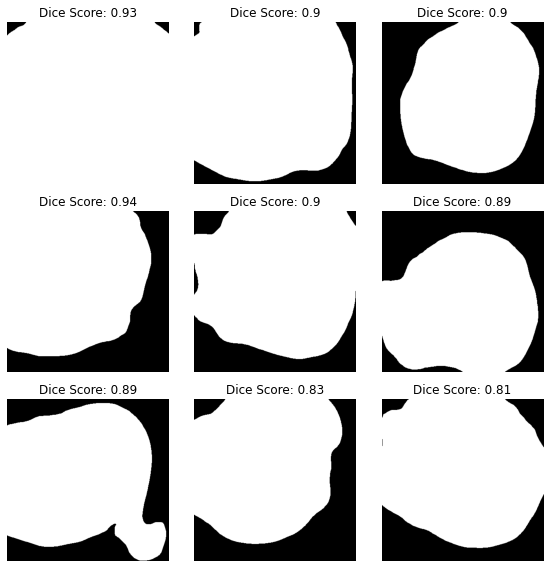

In [13]:
# print(len(retina_model_disc.layers))
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
r,c = 0,0
for b in range(len(dict_list_train)-1):
    if c >= 3:
        c = 0
    show_image_pred(ax[0,c], images_train[dict_list_train[b]],
                    "Dice Score: "+str(round(scores_train[b], 2)))
    show_image_pred(ax[1,c], images_valid[dict_list_valid[b]],
                    "Dice Score: "+str(round(scores_valid[b], 2)))
    show_image_pred(ax[2,c], images_test[dict_list_test[b]],
                    "Dice Score: "+str(round(scores_test[b], 2)))

    c += 1

plt.tight_layout()
plt.show()